# Problem Set #6

MACS 30000, Dr. Evans

Haihao Guo

## Exercise 1

#### A

In [26]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('data/Auto.csv',na_values="?")
df1.dropna(inplace=True)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### B

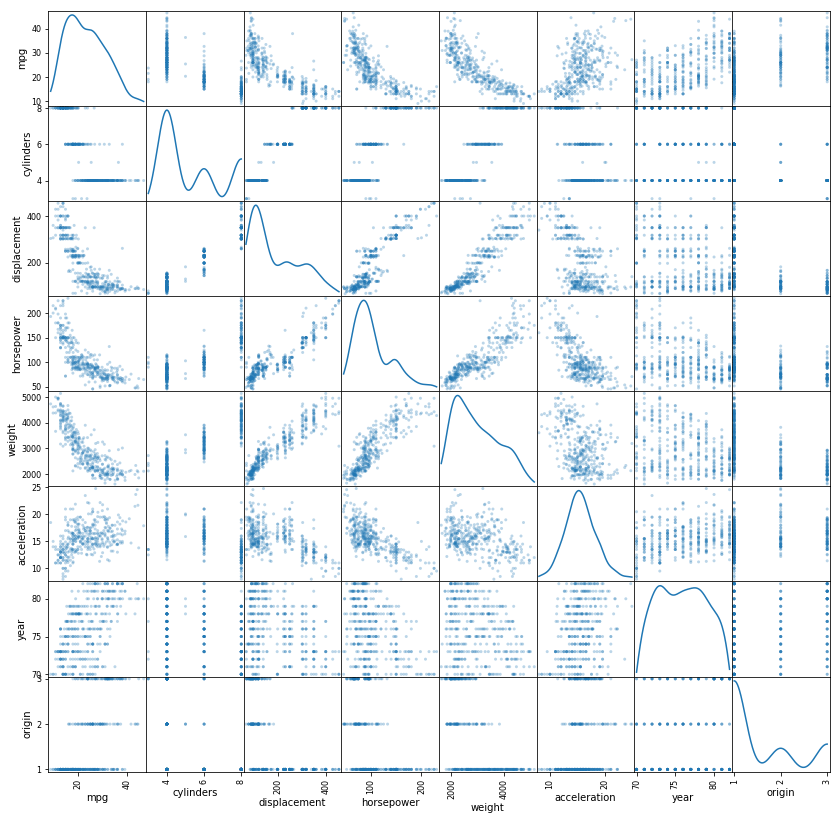

In [27]:
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
scatter_matrix(df1, alpha=0.3, figsize=(14, 14), diagonal='kde')
plt.show()

#### C

In [28]:
df1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### D

In [29]:
import statsmodels.api as sm
df1['const'] = 1
reg1 = sm.OLS(endog=df1['mpg'], exog=df1[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 12 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        21:47:57   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#### 1. 
The coefficients of the variables displacement, weight, year and origin are significant at 1% level.

#### 2. 
The coefficients of the variables cylinders, horsepower and acceleration are not statistically significant at the 10% level.

#### 3. 
The estimated coefficient on $year_i$ equals to 0.7508 reflects that there is a positive correlation between the $year_i$ and $mpg_i$. (Holding the other varialbles constant, one year later of production of the vehicle is expected to increase 0.7508 miles per gallon on average.) However, this does not imply any information about the casual relationship between those two.

#### E
The variables displacement, horsepower and weight are most likely to have a nonlinear relationship with mpg.

In [30]:
df1['displacement_2'] = df1['displacement']**2
df1['horsepower_2'] = df1['horsepower']**2
df1['weight_2'] = df1['weight']**2
df1['acceleration_2'] = df1['acceleration']**2

reg2 = sm.OLS(endog=df1['mpg'], exog=df1[['const', 'cylinders', 'displacement', 'displacement_2', 'horsepower', \
                'horsepower_2', 'weight','weight_2', 'acceleration', 'acceleration_2','year', 'origin']], \
              missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 12 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        21:48:00   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

#### 2.
The adjusted R-squared statistic is 0.866, which is better than 0.818 from part (d).

#### 3.
In part (d), the coefficient of the displacement variable is 0.0199 while it is -0.0169 in this case. Also it is statistically significant at 1% level in part (d). However in part (e), both its coefficient and squared term coefficient are not significant even 10% level.

#### 4.
The cylinders variable is less statistical significant. The p value of the coefficient of cylinders variable increases from 0.128 to 0.440. It is still not significant at the 10% level.

#### F
The predicted miles per gallon is 38.73211109716943.

In [12]:
results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1])[0]

38.73211109716943

## Exercise 2

#### A

In [13]:
df2 = pd.DataFrame([[0, 3, 0, 'Red'], [2, 0, 0, 'Red'], [0, 1, 3, 'Red'], \
                           [0, 1, 2, 'Green'], [-1, 0, 1, 'Green'], [1, 1, 1, 'Red']])
df2.columns = ['X1', 'X2', 'X3', 'Y']
df2.index+=1
df2

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [24]:
df2['dist'] = np.sqrt(df2['X1'] ** 2 + df2['X2'] ** 2 + df2['X3'] ** 2)
df2

,X1,X2,X3,Y,dist
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


The euclidean distance for observations 1-6 is 3, 2, $\sqrt{10}$, $\sqrt{5}$, $\sqrt{2}$, $\sqrt{3}$ respectively.

#### B
KNN prediction would be Green when K=1, since the number 5 has the smallest Euclidean distance.

#### C
KNN prediction would be Red since when K=3, the three closest observations are number 5, 6 and 2 and both Y of 2 and 6 are red

#### D
The best value for K should be large. According to the Bayes (optimal) decision boundary, this best value of K need to capture as much information as it could in this problem. As we could see, we could get as more information when K is bigger. A small K in this case would easily lose information.

#### E

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# 0 for red, 1 for green
X = [[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
y = ['red','red','red','green','green','red']
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
cls = neigh.fit(X, y)
print('The KNN classifier of the test point is',cls.predict([[1,1,1]])[0])

The KNN classifier of the test point is red


## Exercise 3

#### A

In [31]:
tf = df1['mpg']>=df1['mpg'].median()
df1['mpg_high'] = np.where(tf, 1, 0)

reg3 = sm.Logit(endog=df1['mpg_high'], exog=df1[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        21:48:04   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The coefficients of the variables weight and year are significant at 5% level.

#### B

In [32]:
from sklearn.model_selection import train_test_split
y = df1['mpg_high']
X = df1[['cylinders', 'displacement','horsepower', 'weight', \
        'acceleration', 'year', 'origin']]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.5, random_state=10)

#### C

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10, solver='lbfgs', \
    multi_class='multinomial', max_iter=1000).fit(X_train, y_train)
print('β0 =', clf.intercept_)
print('(β1, β2, ...β7) =', clf.coef_[0])

β0 = [-0.10025227]
(β1, β2, ...β7) = [-0.657733    0.00857715 -0.01765876 -0.00257167 -0.10956785  0.16734991
 -0.04695939]


#### D

In [19]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.8724489795918368

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[86 13]
 [12 85]]


In [21]:
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_pred, y_test,target_names=['Low mpg', 'High mpg']))

Classification report:
              precision    recall  f1-score   support

     Low mpg       0.87      0.88      0.87        98
    High mpg       0.88      0.87      0.87        98

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The above result shows almost the same F1 score, precision and recall. Thus, this model predicts high mpg and low mpg almost equally well.